# Probablistic Programming - Chapter 1

These are notes from Chapter 1 of [Cam Davidson Pilon's Probabilistic Programming for Hackers](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers).

* Bayesian world-view interprets probability as measure of believability in an event, as opposed to long-term frequency of events.  Instead, probabilitiy represents confidence in an event - 0 being no confidence (impossible to happen), 1 being full confidence (certain it will happen).
    * Makes more sense for situations that should not be generalized to long-term (eg. presidential elections).
    * Allows for perspective to be baked into calculations, based on prior information and biases available to observer.
* **Prior**: $P(A)$; **posterior**: $P(A|X)$, where $X$ is evidence.
    * Frequentists typically report a summary statistic + error bars on that statistic.  Bayesians report a summary probabilitiy distribution (possibly using corresponding summary statistics).
    * For large $N$, Bayesian and Frequentist methods often approach one another.
* Bayes's Theorem:

$$
P(A|X) = \frac{P(X|A)P(A)}{P(X)}
$$

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Mandatory Coin Flip Example

In [ ]:
# Generate a bunch
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

Th

In [8]:
dist = stats.beta
dist.pdf(np.linspace(0, 1, 100), 11, 11)

array([0.00000000e+00, 3.87591916e-14, 3.58204678e-11, 1.86225364e-09,
       2.97817299e-08, 2.49512630e-07, 1.38821248e-06, 5.82066530e-06,
       1.98347964e-05, 5.76718845e-05, 1.47915614e-04, 3.42663248e-04,
       7.29657315e-04, 1.44721145e-03, 2.70136686e-03, 4.78431102e-03,
       8.09272354e-03, 1.31444280e-02, 2.05915573e-02, 3.12284072e-02,
       4.59922677e-02, 6.59557902e-02, 9.23098433e-02, 1.26336324e-01,
       1.69370982e-01, 2.22756937e-01, 2.87790222e-01, 3.65659246e-01,
       4.57380615e-01, 5.63734135e-01, 6.85200085e-01, 8.21901966e-01,
       9.73557853e-01, 1.13944327e+00, 1.31836811e+00, 1.50866959e+00,
       1.70822257e+00, 1.91446790e+00, 2.12445859e+00, 2.33492281e+00,
       2.54234207e+00, 2.74304200e+00, 2.93329279e+00, 3.10941565e+00,
       3.26789139e+00, 3.40546711e+00, 3.51925687e+00, 3.60683246e+00,
       3.66630076e+00, 3.69636456e+00, 3.69636456e+00, 3.66630076e+00,
       3.60683246e+00, 3.51925687e+00, 3.40546711e+00, 3.26789139e+00,
      

<IPython.core.display.Javascript object>


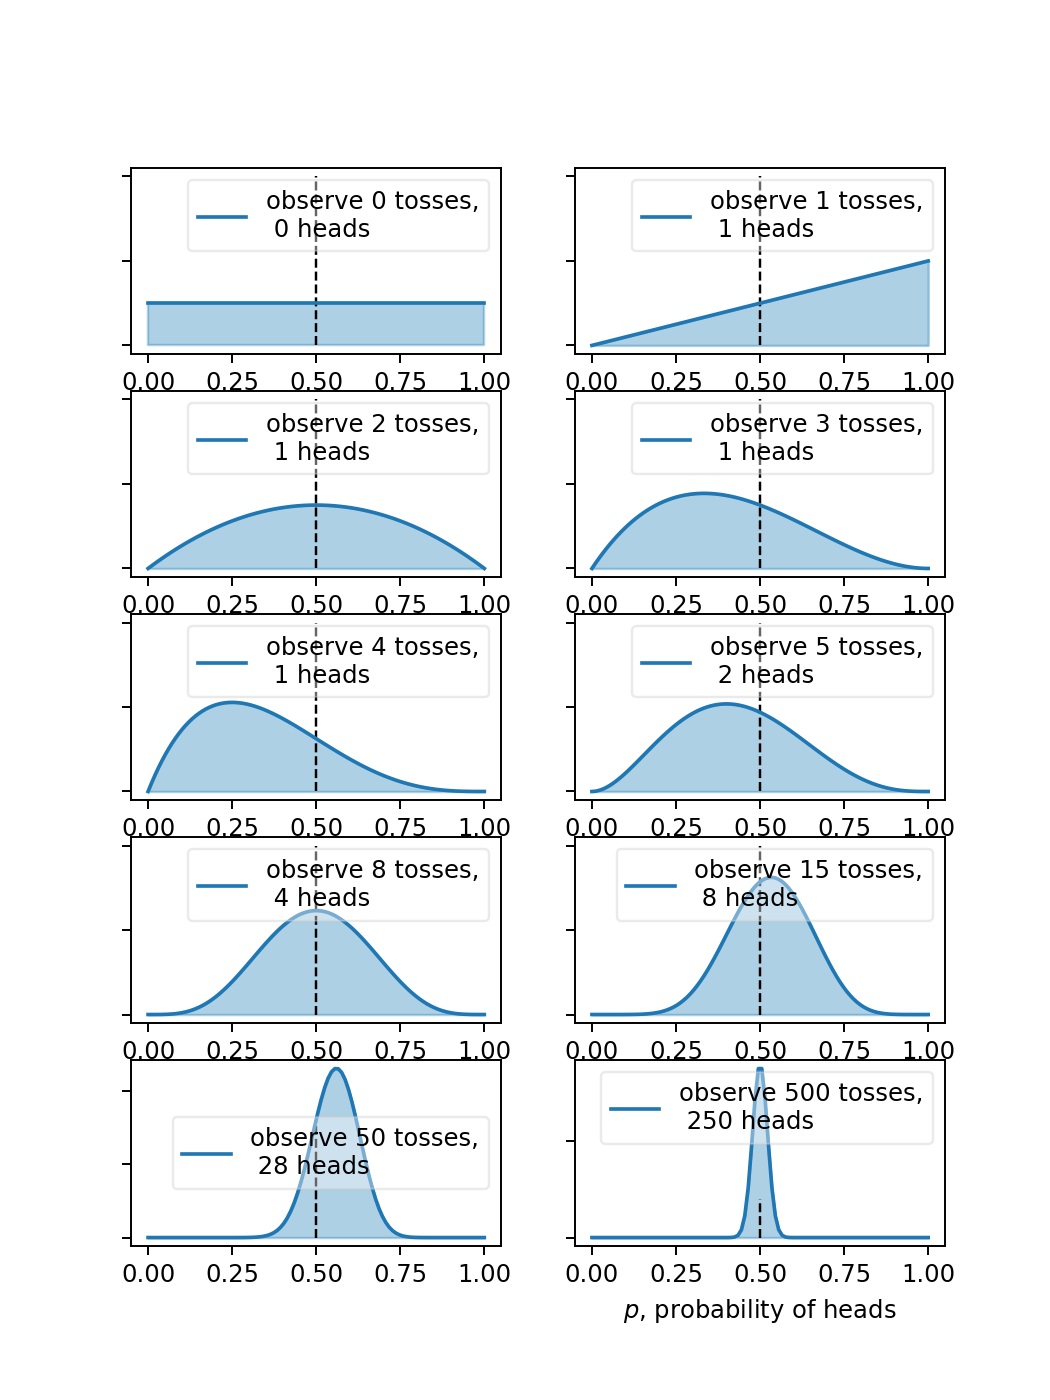

In [6]:
dist = stats.beta

plt.figure(figsize=(6, 9))

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)

In [ ]:
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()